In [680]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
from scipy.interpolate import interp1d
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [430]:
df = pd.read_excel('gas_model_data_convert.xlsx')

In [431]:
df.replace(-9999, np.nan, regex=True, inplace = True)
df[columns_to_int].min()

air_molar_volume      0.023152
e                   571.920000
wind_speed            0.056612
max_wind_speed        0.614675
wind_dir              0.039097
dtype: float64

In [432]:
df.drop(columns=['Unnamed: 0', 'Date', 'Time','date_x', 'time','filename', 'date_y', 'Month',
       'Day', 'daytime','UNIXTIME', 'Дата', 'Время','Напр АКБ', 'Температура логгера', 'Направление ветра', 
        'ALB_1_1_1 (альбедо)', 'LWIN_1_1_1 ', 'LWOUT_1_1_1',
       'PPFD_1_1_1 плотность потока фотосинтетических фотонов облучающего поверхность в микромоль/м2/сек.',
       'P_RAIN_1_1_1 (осадки)', 'RH_1_1_1 ()',
       'RN_1_1_1 (радиационный баланс)', 'SWIN_1_1_1 (коротковолновая рад)',
       'SWOUT_1_1_1', 'TA_1_1_1', 'TS_1_1_1', 'TS_2_1_1', 'TS_3_1_1',
       'TS_4_1_1', 'TS_5_1_1', 'TS_6_1_1', 'filename', 'date_y', 'Month',
       'Day', 'daytime', 'air_molar_volume', 'e', 'wind_speed',
       'max_wind_speed', 'wind_dir', 'u*'], inplace = True)

# Визуализация распределений всех параметров

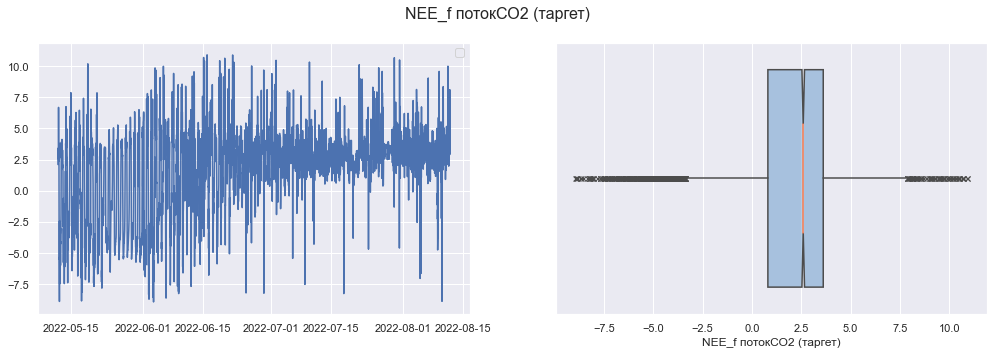

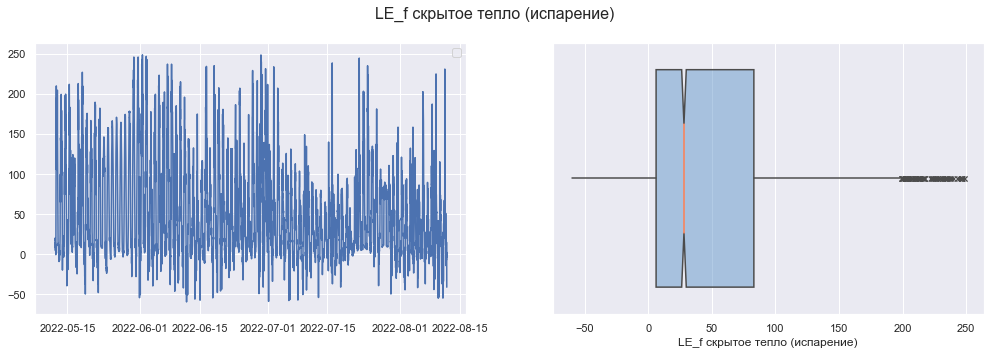

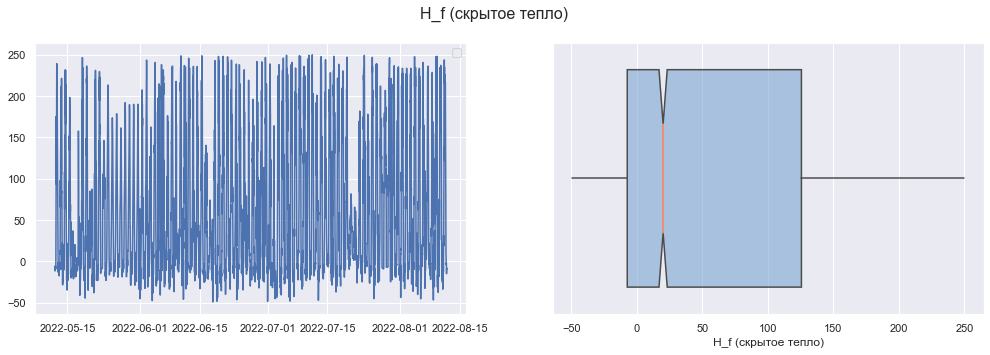

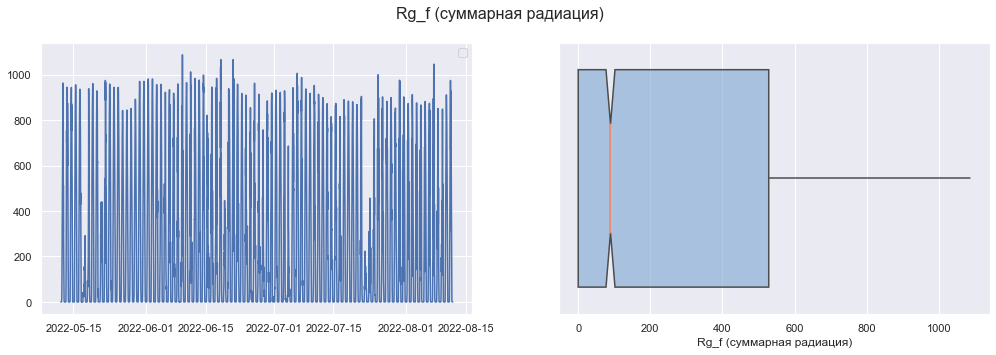

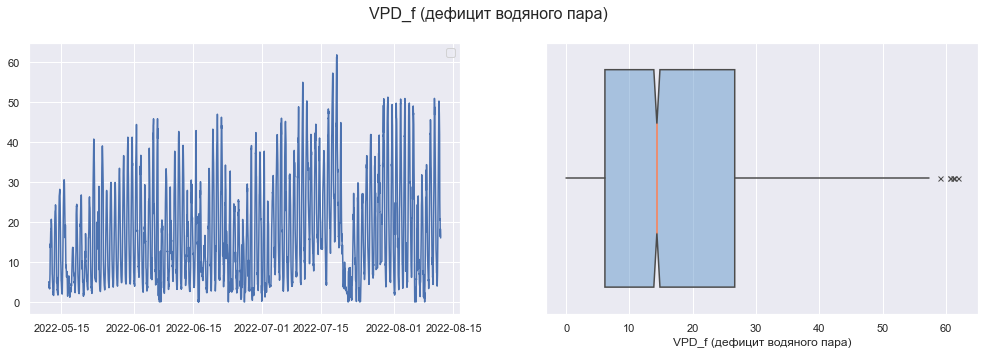

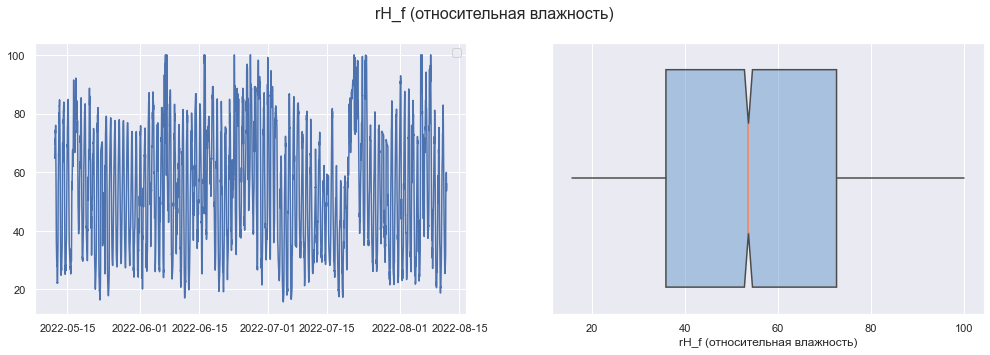

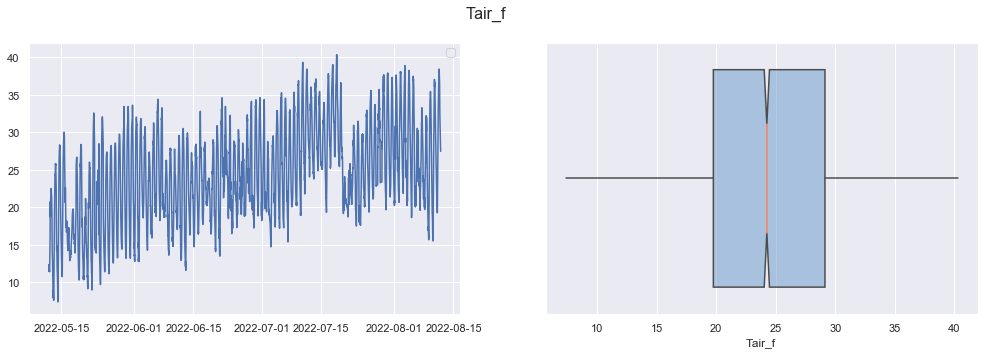

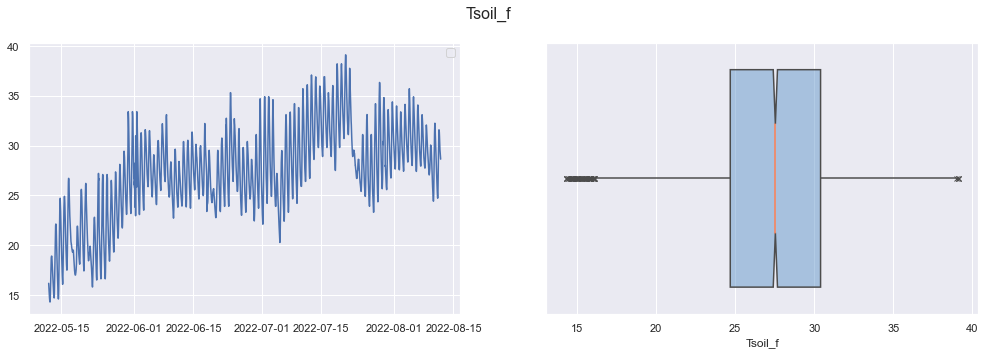

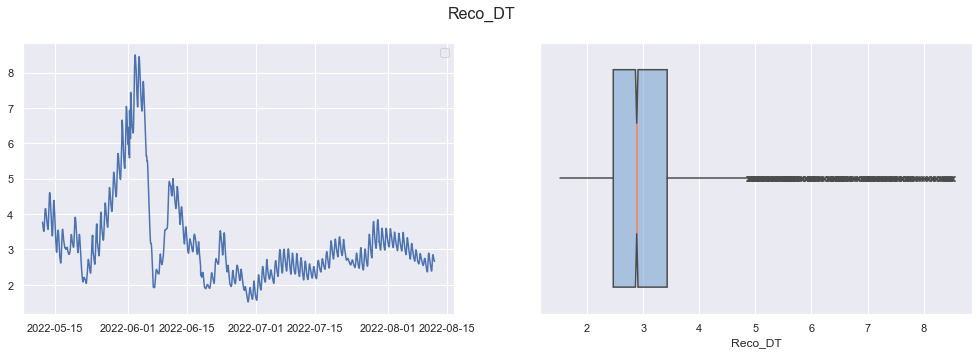

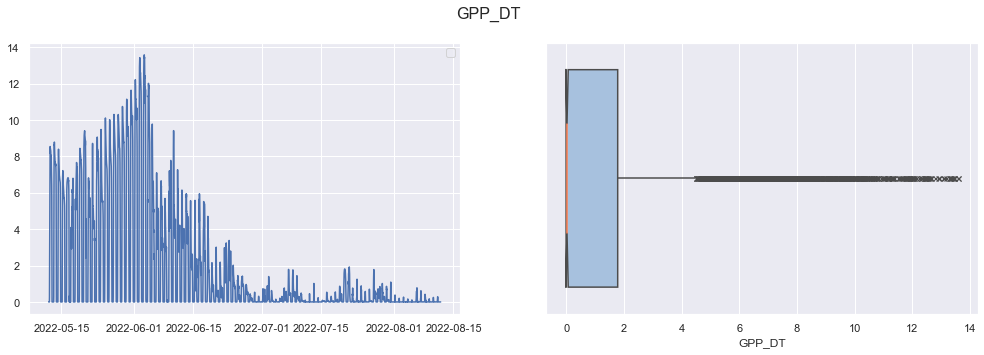

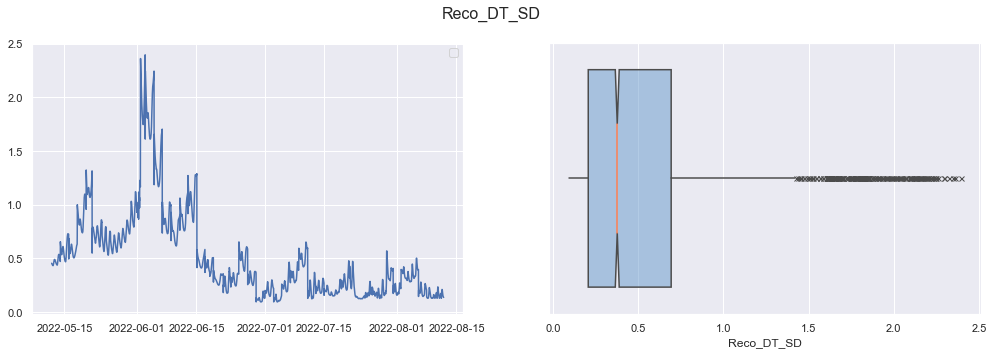

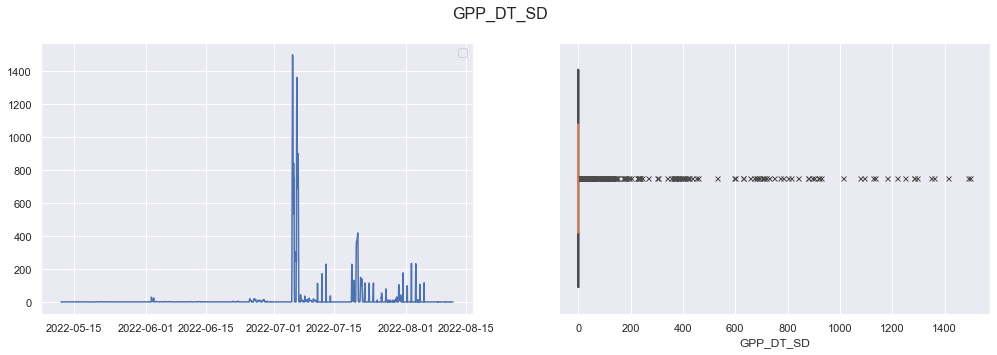

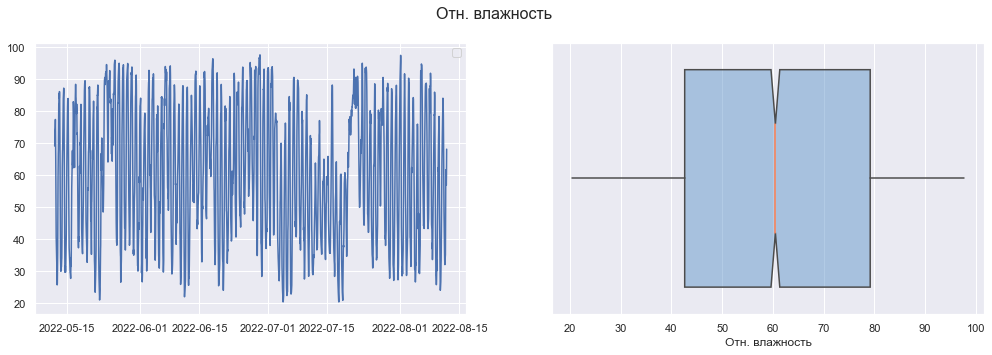

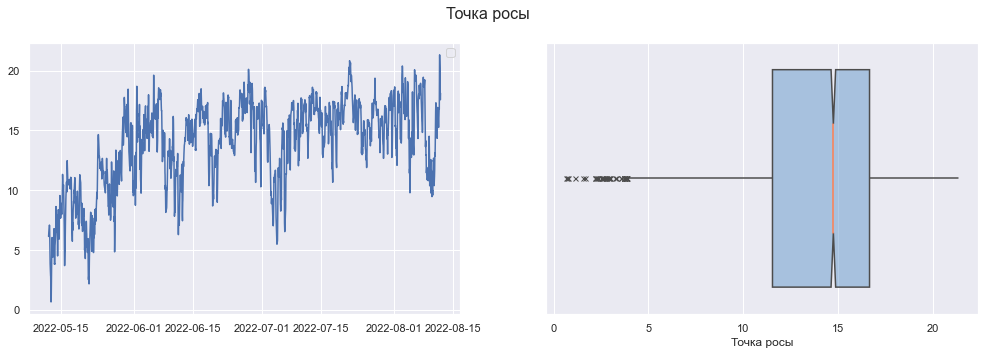

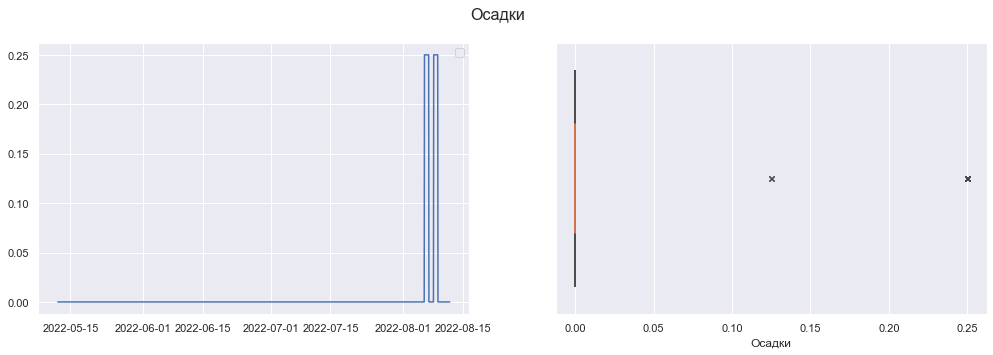

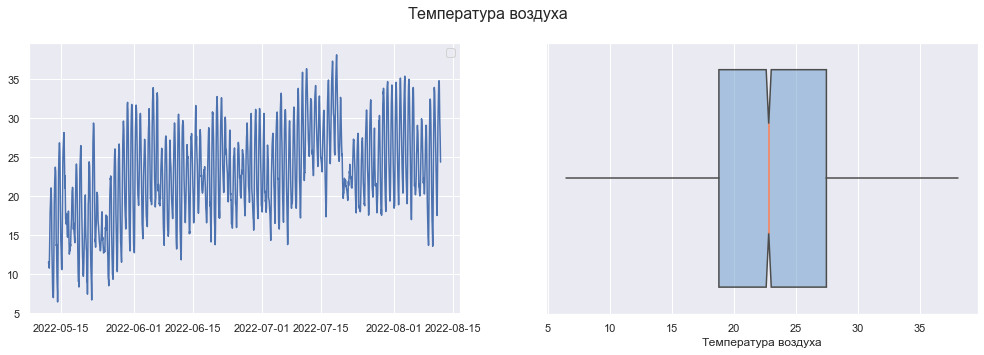

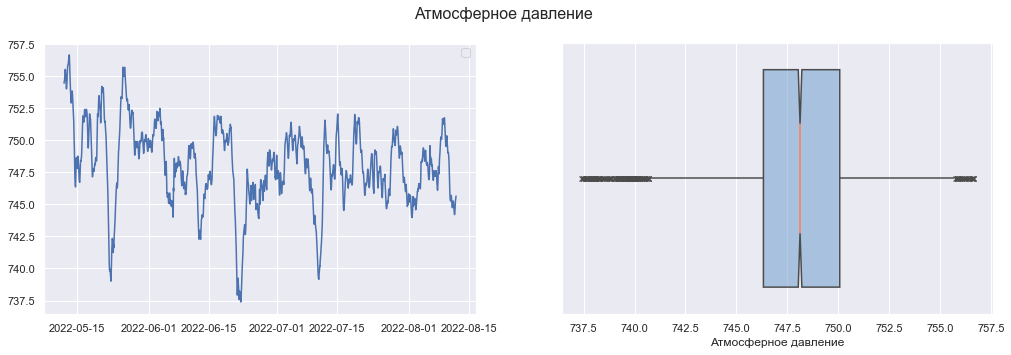

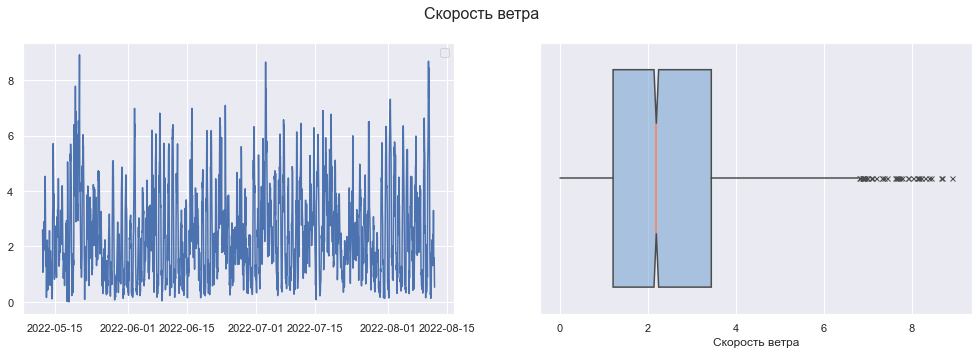

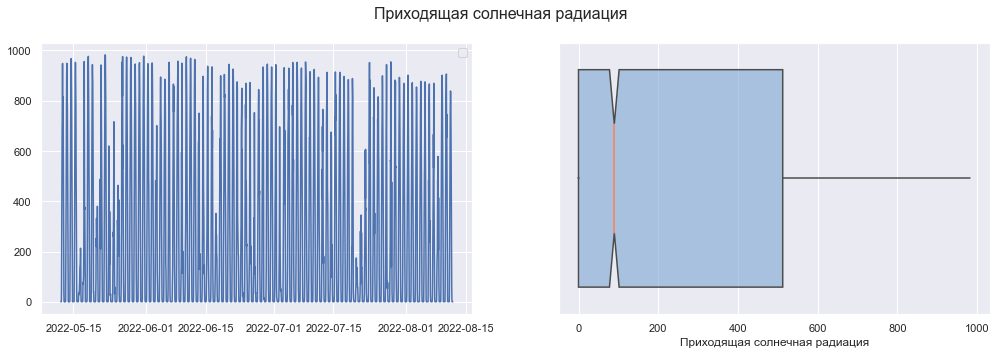

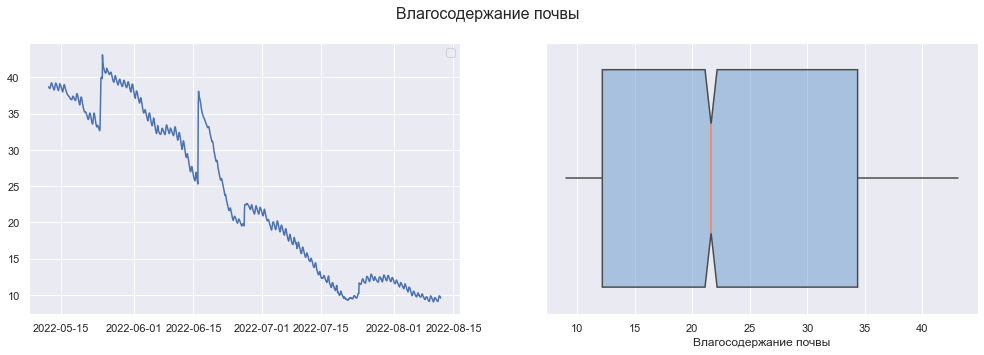

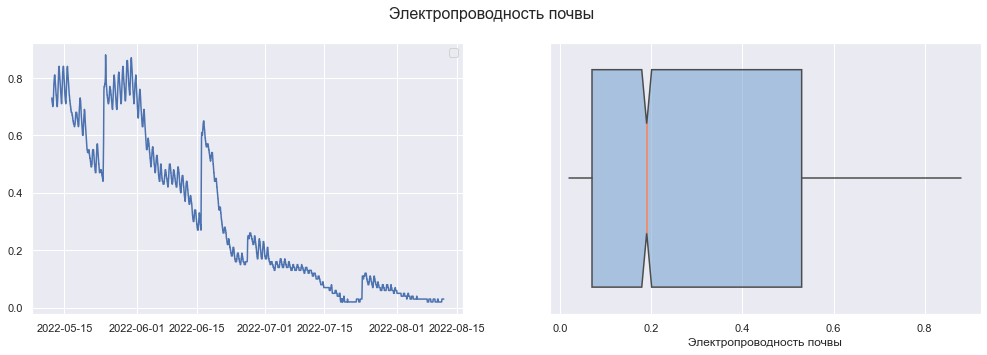

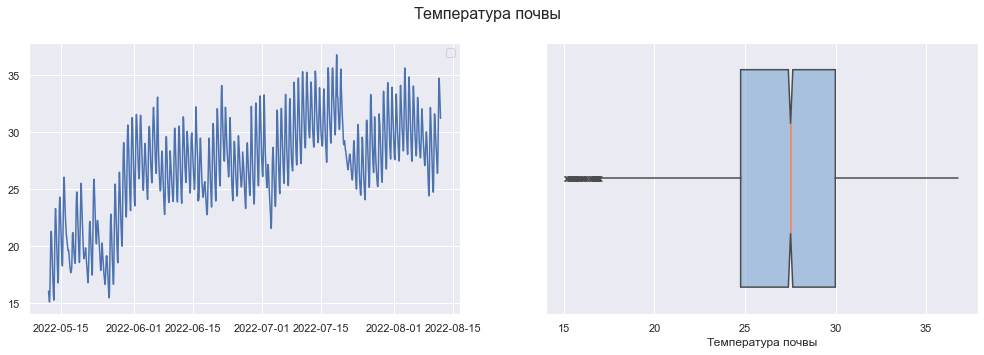

In [435]:
columns = list(df.columns)
columns.remove('datetime')
for i in columns:
    fig, (ax1, ax2) = plt.subplots(figsize=(17, 5),ncols=2,sharex=False, sharey=False)
    line1, = ax1.plot(df['datetime'],df[i])
    ax1.legend(handles=[line1])
    sns.boxplot(ax=ax2, x = df[i], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},)
    fig.suptitle(i, fontsize=16)

In [436]:
df.dropna(inplace = True)
df.isnull().sum()

NEE_f потокСО2 (таргет)           0
LE_f скрытое тепло (испарение)    0
H_f (скрытое тепло)               0
Rg_f (суммарная радиация)         0
VPD_f (дефицит водяного пара)     0
rH_f (относительная влажность)    0
Tair_f                            0
Tsoil_f                           0
Reco_DT                           0
GPP_DT                            0
Reco_DT_SD                        0
GPP_DT_SD                         0
datetime                          0
Отн. влажность                    0
Точка росы                        0
Осадки                            0
Температура воздуха               0
Атмосферное давление              0
Скорость ветра                    0
Приходящая солнечная радиация     0
Влагосодержание почвы             0
Электропроводность почвы          0
Температура почвы                 0
dtype: int64

<AxesSubplot:>

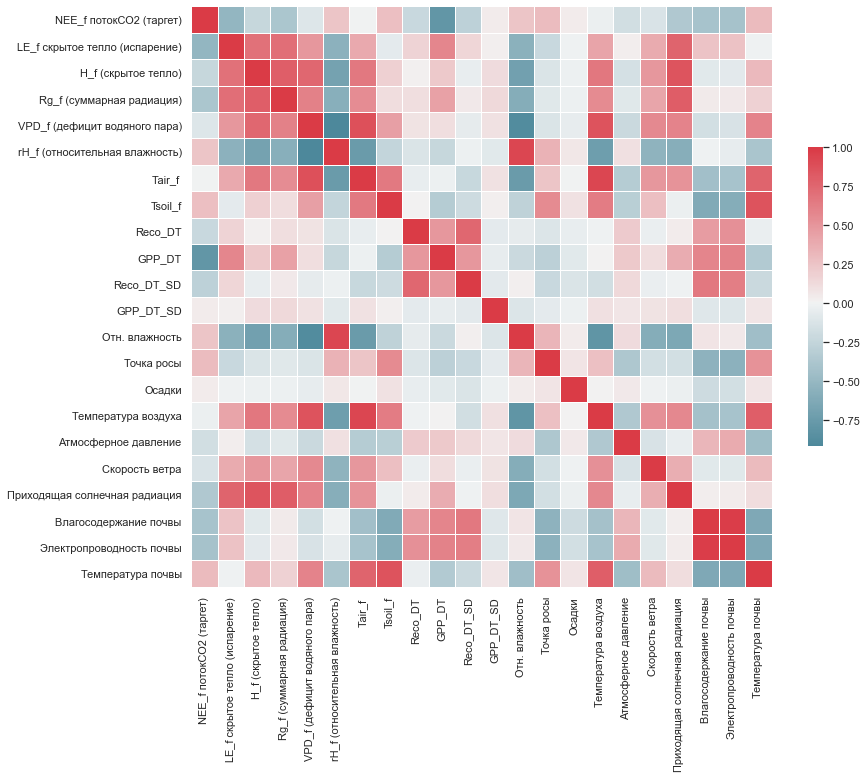

In [438]:
corr = df.corr()
f, ax = plt.subplots(figsize=(13, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0., square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Удаление скоррелированных признаков

In [439]:
df.drop(columns=['rH_f (относительная влажность)','Tair_f ', 'Tsoil_f', 'Reco_DT_SD', 'GPP_DT_SD'], inplace = True)

In [577]:
# fig, ax = plt.subplots(figsize=(17, 5))
# ax.plot(df['datetime'], df['NEE_f потокСО2 (таргет)'], linewidth=2.0)

# split_date = '2022-07-20'
# train = df.loc[df.datetime <= split_date].copy()
# test = df.loc[df.datetime > split_date].copy()

# fig, ax = plt.subplots(figsize=(17, 5))
# line1, = ax.plot(train['datetime'],train['NEE_f потокСО2 (таргет)'], label='train')
# line2, = ax.plot(test['datetime'],test['NEE_f потокСО2 (таргет)'], label='test', color = 'red')
# ax.legend(handles=[line1, line2])

# train.drop(columns=['datetime'], inplace = True)
# test.drop(columns=['datetime'], inplace = True)

# train.info()

# x_train = train.loc[:, train.columns != 'NEE_f потокСО2 (таргет)']
# y_train = train.loc[:, train.columns == 'NEE_f потокСО2 (таргет)']

# x_test = test.loc[:, test.columns != 'NEE_f потокСО2 (таргет)']
# y_test = test.loc[:, test.columns == 'NEE_f потокСО2 (таргет)']

# train_dataset = cb.Pool(x_train, y_train) 
# test_dataset = cb.Pool(x_test, y_test)

# model = cb.CatBoostRegressor(loss_function='RMSE')

# grid = {'iterations': [100, 150, 200],
#         'learning_rate': [0.03, 0.1],
#         'depth': [2, 4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}
# model.grid_search(grid, train_dataset)

# pred = model.predict(x_test)
# rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# r2 = r2_score(y_test, pred)
# print('Testing performance')
# print('RMSE: {:.2f}'.format(rmse))
# print('R2: {:.2f}'.format(r2))

# Моделирование

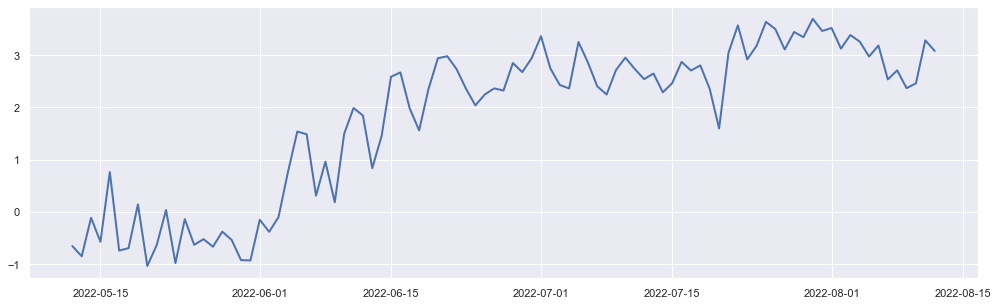

In [618]:
df_group = df.groupby([df['datetime'].dt.date]).mean()
df_group.reset_index(inplace = True)
df_group['datetime'] = pd.to_datetime(df_group['datetime'], format='%Y-%m-%d')

matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(df_group['datetime'], df_group['NEE_f потокСО2 (таргет)'], linewidth=2.0)

In [640]:
df_group["month"] = df_group["datetime"].dt.month
df_group["day"] = df_group["datetime"].dt.day

df_group.drop(columns=['datetime'], inplace = True)

X = df_group.loc[:, df_group.columns != 'NEE_f потокСО2 (таргет)']
y = df_group.loc[:, df_group.columns == 'NEE_f потокСО2 (таргет)']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 16), (28, 16), (65, 1), (28, 1))

# RandomForestRegressor

In [623]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

In [624]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

R2 train data: 0.987, R2 test data: 0.712


# CatBoostRegressor

In [625]:
CatBoost_model = cb.CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
CatBoost_model.fit(x_train,y_train)
CatBoost_train_pred = CatBoost_model.predict(x_train)
CatBoost_test_pred = CatBoost_model.predict(x_test)

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,CatBoost_train_pred),
r2_score(y_test,CatBoost_test_pred)))

In [632]:
y_predict= CatBoost_model.predict(X)

df_group = df.groupby([df['datetime'].dt.date]).mean()
df_group.reset_index(inplace = True)
df_group['datetime'] = pd.to_datetime(df_group['datetime'], format='%Y-%m-%d')
df_group['CatBoost_predict'] = y_predict

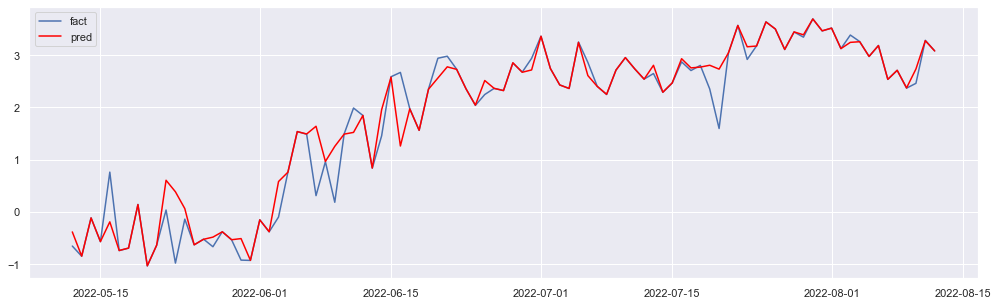

In [633]:
fig, ax = plt.subplots(figsize=(17, 5))
line1, = ax.plot(df_group['datetime'],df_group['NEE_f потокСО2 (таргет)'], label='fact')
line2, = ax.plot(df_group['datetime'],df_group['CatBoost_predict'], label='pred', color = 'red')
ax.legend(handles=[line1, line2])

In [634]:
feature_importance_df = pd.DataFrame(CatBoost_model.get_feature_importance(prettified=True))
feature_importance_df

,Feature Id,Importances
0,GPP_DT,19.312858
1,Влагосодержание почвы,16.347781
2,month,11.238426
3,Электропроводность почвы,11.138299
4,Температура воздуха,4.436021
5,Точка росы,4.372649
6,day,3.960514
7,Rg_f (суммарная радиация),3.923489
8,Температура почвы,3.426317
9,LE_f скрытое тепло (испарение),3.204154


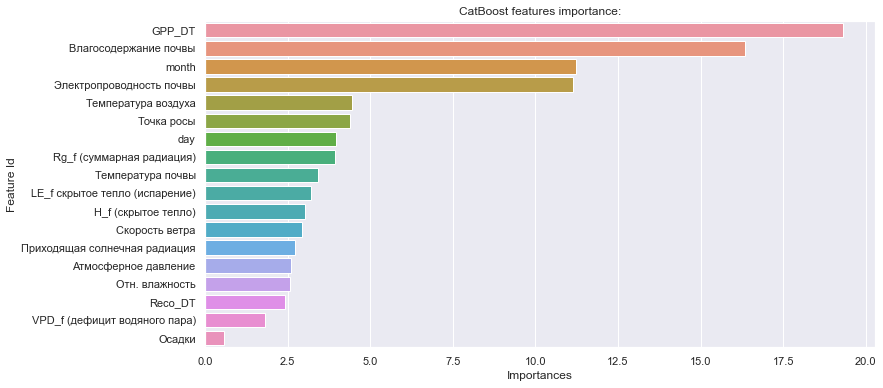

In [635]:
plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

# Что будет, если не осреднить по дням?

In [652]:
df_fact = df.copy()

In [655]:
df_fact["month"] = df_fact["datetime"].dt.month
df_fact["day"] = df_fact["datetime"].dt.day

df_fact.drop(columns=['datetime'], inplace = True)

X = df_fact.loc[:, df_fact.columns != 'NEE_f потокСО2 (таргет)']
y = df_fact.loc[:, df_fact.columns == 'NEE_f потокСО2 (таргет)']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3090, 18), (1325, 18), (3090, 1), (1325, 1))

In [656]:
CatBoost_model = cb.CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
CatBoost_model.fit(x_train,y_train)
CatBoost_train_pred = CatBoost_model.predict(x_train)
CatBoost_test_pred = CatBoost_model.predict(x_test)

In [657]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,CatBoost_train_pred),
r2_score(y_test,CatBoost_test_pred)))

R2 train data: 0.935, R2 test data: 0.762


In [663]:
y_predict= CatBoost_model.predict(X)

df_fact = df.copy()
df_fact['CatBoost_predict'] = y_predict

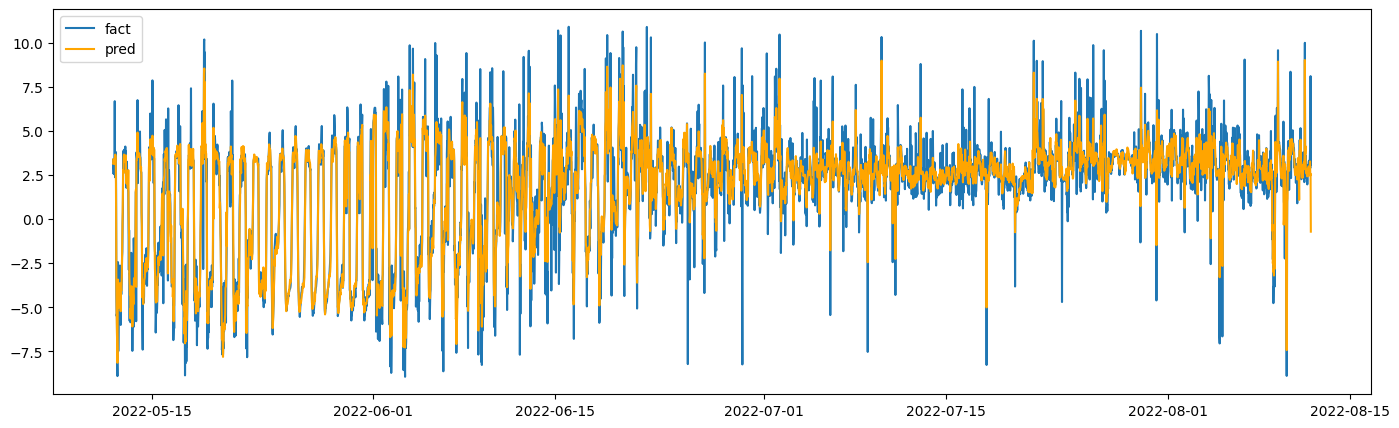

In [684]:
fig, ax = plt.subplots(figsize=(17, 5))
line1, = ax.plot(df_fact['datetime'],df_fact['NEE_f потокСО2 (таргет)'], label='fact')
line2, = ax.plot(df_fact['datetime'],df_fact['CatBoost_predict'], label='pred', color = 'orange')
ax.legend(handles=[line1, line2])

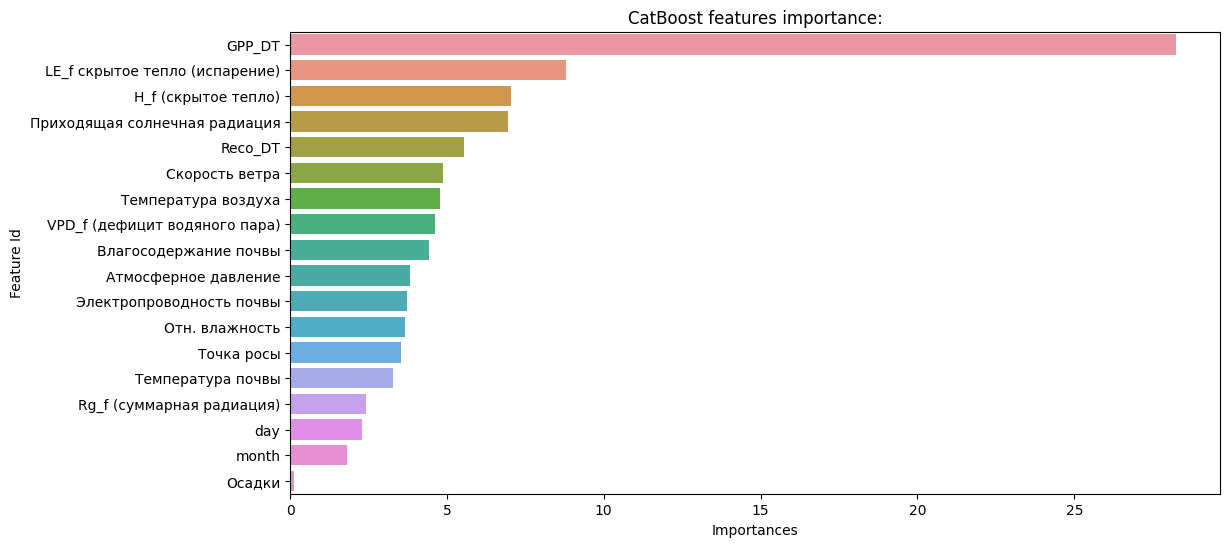

In [682]:
feature_importance_df = pd.DataFrame(CatBoost_model.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

# интерполяция PPFD

In [688]:
df = pd.read_excel('gas_model_data_convert.xlsx')

In [691]:
df.replace(-9999, np.nan, regex=True, inplace = True)
df[columns_to_int].min()

air_molar_volume      0.023152
e                   571.920000
wind_speed            0.056612
max_wind_speed        0.614675
wind_dir              0.039097
dtype: float64

In [698]:
df.rename(columns={"PPFD_1_1_1 плотность потока фотосинтетических фотонов облучающего поверхность в микромоль/м2/сек.":
                   "PPFD"}, inplace = True)

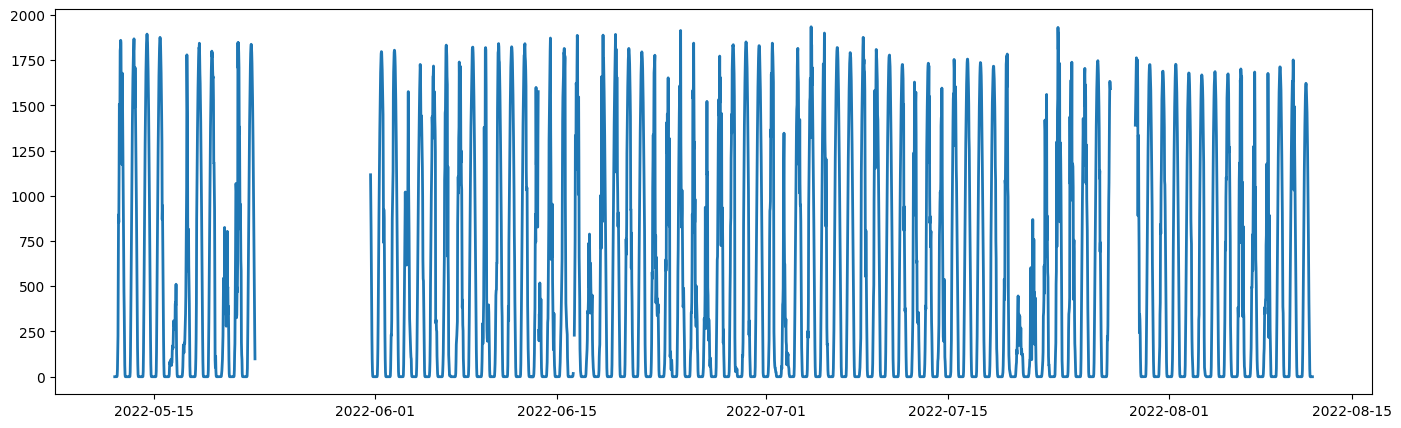

In [700]:
# matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(df['datetime'], df['PPFD'], linewidth=2.0)

## Среднее PPFD для каждого часа

In [812]:
means = df.resample('H', on='datetime').mean()
means.reset_index(inplace = True)
means['hour'] = means['datetime'].dt.hour
means = means.groupby('hour').mean().reset_index()
means = means[['hour','PPFD']]
means_PPFD = means.set_index('hour').T.to_dict('list')

for k, v in means_PPFD.items():
    means_PPFD[k] = v[0]

In [836]:
means_PPFD

{0: -0.027635311579268296,
 1: -0.02237143950617284,
 2: -0.018824493722222224,
 3: -0.01576078301851852,
 4: 1.956327310925926,
 5: 58.74120518518519,
 6: 251.33434312499998,
 7: 538.3352907407408,
 8: 866.1690549382716,
 9: 1155.0640396341464,
 10: 1339.3039969512195,
 11: 1509.519280487805,
 12: 1529.967024691358,
 13: 1446.421672839506,
 14: 1271.149925925926,
 15: 1008.7499413580246,
 16: 745.7903408536586,
 17: 487.7096101219512,
 18: 235.86876353658536,
 19: 55.52301445121951,
 20: 1.9367931575993826,
 21: -0.055450223358024686,
 22: -0.04173805330246914,
 23: -0.034028867179012344}

In [838]:
df['hour'] = df['datetime'].dt.hour

In [847]:
df['PPFD'] = df.PPFD.fillna(df.hour.map(means_PPFD))

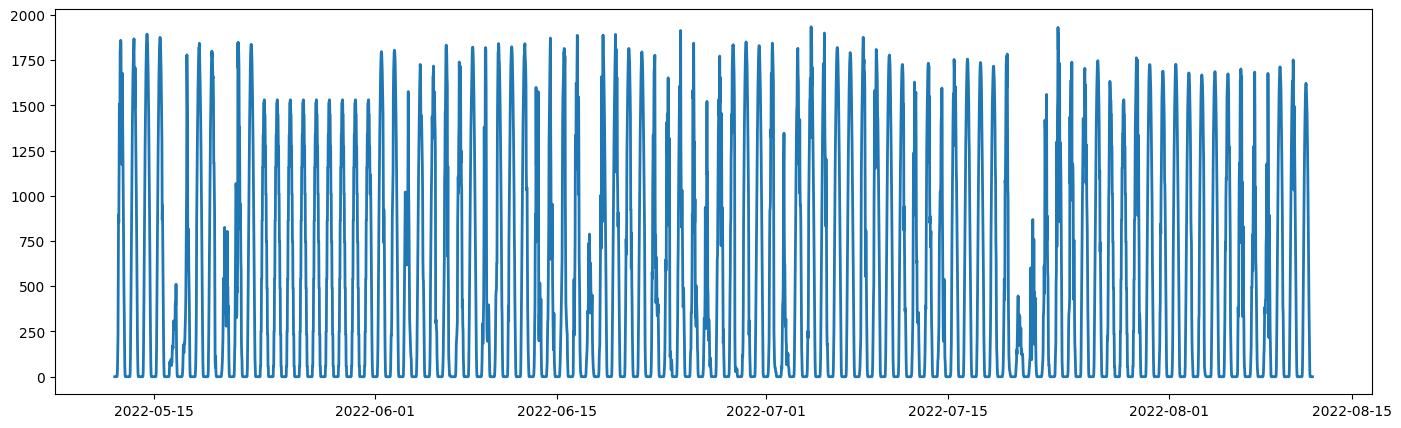

In [848]:
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(df['datetime'], df['PPFD'], linewidth=2.0)

# Моделирование с PPFD

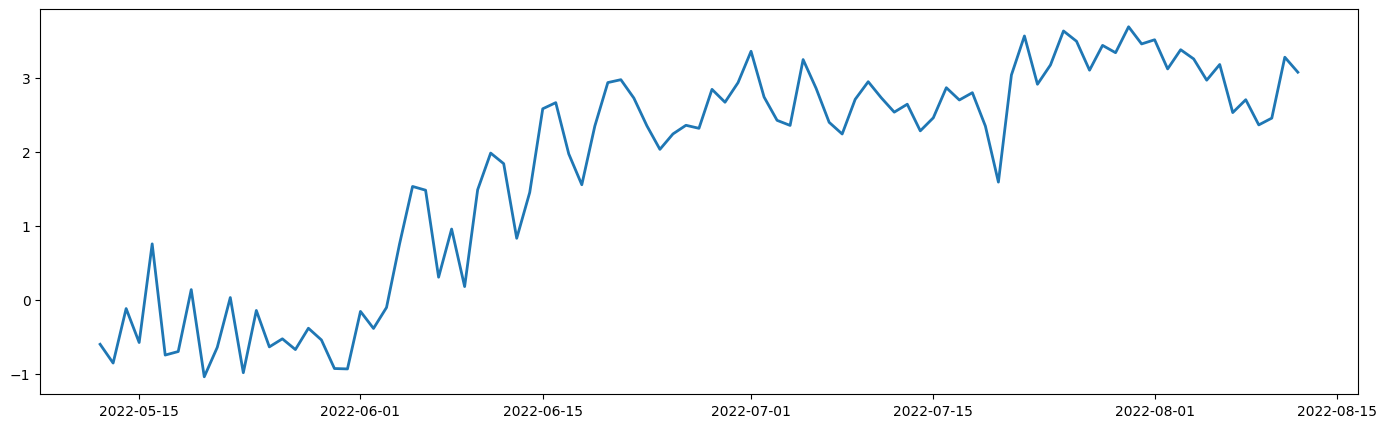

In [849]:
df_group = df.groupby([df['datetime'].dt.date]).mean()
df_group.reset_index(inplace = True)
df_group['datetime'] = pd.to_datetime(df_group['datetime'], format='%Y-%m-%d')

matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(df_group['datetime'], df_group['NEE_f потокСО2 (таргет)'], linewidth=2.0)

In [850]:
df_group["month"] = df_group["datetime"].dt.month
df_group["day"] = df_group["datetime"].dt.day

df_group.drop(columns=['datetime'], inplace = True)

X = df_group.loc[:, df_group.columns != 'NEE_f потокСО2 (таргет)']
y = df_group.loc[:, df_group.columns == 'NEE_f потокСО2 (таргет)']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 16), (28, 16), (65, 1), (28, 1))

In [851]:
CatBoost_model = cb.CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
CatBoost_model.fit(x_train,y_train)
CatBoost_train_pred = CatBoost_model.predict(x_train)
CatBoost_test_pred = CatBoost_model.predict(x_test)

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,CatBoost_train_pred),
r2_score(y_test,CatBoost_test_pred)))

R2 train data: 1.000, R2 test data: 0.850


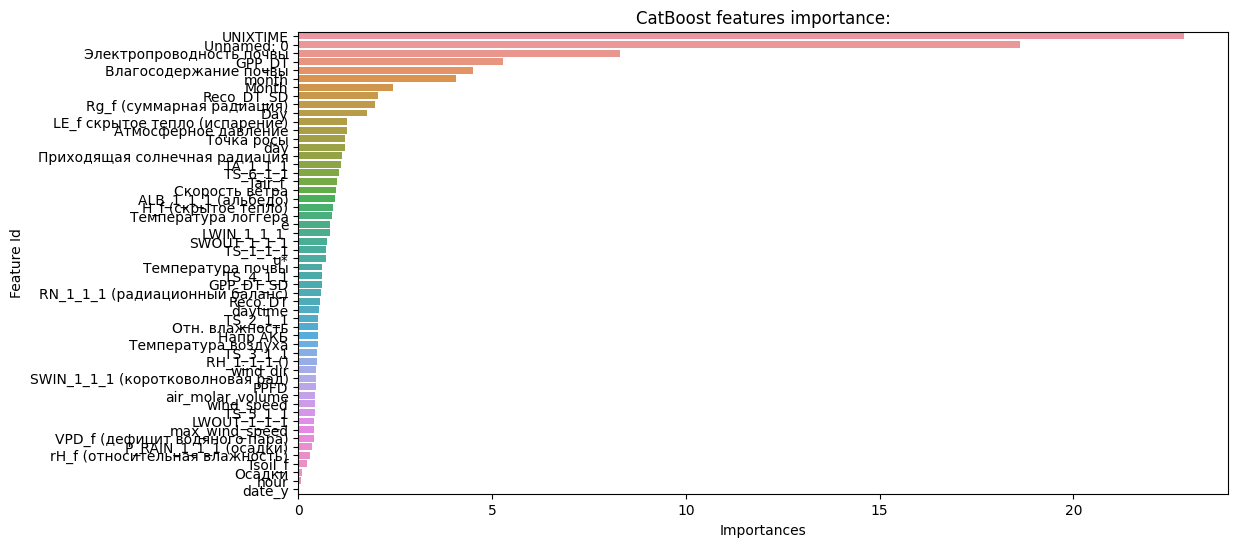

In [852]:
feature_importance_df = pd.DataFrame(CatBoost_model.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');